In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA, FastICA
plt.style.use("ggplot")
%matplotlib inline

In [2]:
train = pd.read_csv("data/train.csv", index_col="ID")
test = pd.read_csv("data/test.csv", index_col="ID")

In [3]:
train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
6,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
7,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
9,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
13,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

In [17]:
# X0-X8 are alphanumeric
train.iloc[:, 1:12].head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11
0,130.81,k,v,at,a,d,u,j,o,0,0
1,88.53,k,t,av,e,d,y,l,o,0,0
2,76.26,az,w,n,c,d,x,j,x,0,0
3,80.62,az,t,n,f,d,x,l,e,0,0
4,78.02,az,v,n,f,d,h,d,n,0,0


In [37]:
train.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [19]:
train.X0.value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
aq     18
i      18
am     18
u      17
l      16
aw     16
ad     14
b      11
au     11
k      11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
g       1
ac      1
ab      1
Name: X0, dtype: int64

In [20]:
train.X1.value_counts()

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
f      23
y      23
j      22
n      19
k      17
p       9
g       6
ab      3
d       3
q       3
Name: X1, dtype: int64

In [21]:
train.X2.value_counts()

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      20
ag      19
z       19
d       18
ac      13
g       12
y       11
ap      11
x       10
aw       8
at       6
h        6
q        5
al       5
an       5
av       4
p        4
ah       4
au       3
c        1
ar       1
am       1
l        1
o        1
aa       1
j        1
af       1
Name: X2, dtype: int64

In [22]:
train.X3.value_counts()

c    1942
f    1076
a     440
d     290
g     241
e     163
b      57
Name: X3, dtype: int64

In [23]:
train.X4.value_counts()

d    4205
a       2
b       1
c       1
Name: X4, dtype: int64

In [24]:
train.X5.value_counts()

w     231
v     231
q     220
r     215
s     214
d     214
n     212
m     208
p     208
i     207
ae    205
ag    204
ac    200
ab    197
l     195
af    188
ad    185
k     177
c     131
j     125
aa    112
ah     97
o      20
f       7
x       2
h       1
y       1
g       1
u       1
Name: X5, dtype: int64

In [25]:
train.X6.value_counts()

g    1042
j    1039
d     625
i     488
l     478
a     206
h     190
k      43
c      38
b      28
f      20
e      12
Name: X6, dtype: int64

In [30]:
# X7 is missing
train.X8.value_counts()

j    277
s    255
f    243
n    242
i    237
e    225
r    219
a    210
w    196
v    194
b    190
k    176
o    163
m    155
g    130
u    119
t    119
q    117
h    117
y    116
x    105
d    103
l    101
c    100
p    100
Name: X8, dtype: int64

### Check for one hot encoding

In [10]:
set(train.X1.values) == set(test.X1.values)

True

In [11]:
set(train.X2.values) == set(test.X2.values)

False

In [14]:
set(train.X2.values), set(test.X2.values)

({'a',
  'aa',
  'ac',
  'ae',
  'af',
  'ag',
  'ah',
  'ai',
  'ak',
  'al',
  'am',
  'an',
  'ao',
  'ap',
  'aq',
  'ar',
  'as',
  'at',
  'au',
  'av',
  'aw',
  'ay',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'x',
  'y',
  'z'},
 {'a',
  'ab',
  'ac',
  'ad',
  'ae',
  'af',
  'ag',
  'ah',
  'ai',
  'aj',
  'ak',
  'al',
  'am',
  'an',
  'ao',
  'ap',
  'aq',
  'as',
  'at',
  'au',
  'av',
  'aw',
  'ax',
  'ay',
  'b',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'm',
  'n',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'w',
  'x',
  'y',
  'z'})

In [15]:
set(train.X3.values) == set(test.X3.values)

True

In [16]:
set(train.X4.values) == set(test.X4.values)

True

In [17]:
set(train.X5.values) == set(test.X5.values)

False

In [20]:
set(train.X5.values), set(test.X5.values)

({'aa',
  'ab',
  'ac',
  'ad',
  'ae',
  'af',
  'ag',
  'ah',
  'c',
  'd',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  'u',
  'v',
  'w',
  'x',
  'y'},
 {'a',
  'aa',
  'ab',
  'ac',
  'ad',
  'ae',
  'af',
  'ag',
  'ah',
  'b',
  'c',
  'd',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'v',
  'w',
  'x',
  'y',
  'z'})

In [18]:
set(train.X6.values) == set(test.X6.values)

True

In [23]:
set(train.X8.values) == set(test.X8.values)

True

### Dimension Reduction

In [6]:
train["data"] = "train"
test["data"] = "test"

combined_data = pd.concat([train, test])
encoded = pd.get_dummies(combined_data[["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]])
drop_cat = combined_data.drop(["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"], axis=1)
combined_data_clean = drop_cat.join(encoded)

train_data = combined_data_clean[combined_data_clean.data == "train"].copy()
test_data = combined_data_clean[combined_data_clean.data == "test"].copy()

train_data.drop("data", axis=1, inplace=True)
test_data.drop(["data", "y"], axis=1, inplace=True)

In [9]:
y_train = train_data["y"].astype(np.float32)
x_train =  train_data.drop("y", axis=1).astype(np.float32)
x_test = test_data.astype(np.float32)

In [12]:
x_train.shape

(4209, 579)

In [14]:
n_comp = 128
pca = PCA(n_components=n_comp, random_state=42)
pca_train = pca.fit(x_train)

In [17]:
sum(pca_train.explained_variance_ratio_)

0.94219349465571733

In [21]:
explained_variance = []
for i in range(0, 256, 8):
    pca = PCA(n_components=i, random_state=42)
    pca_train = pca.fit(x_train)
    explained_variance.append((i, sum(pca_train.explained_variance_ratio_)))

In [22]:
dict(explained_variance)

{0: 0,
 8: 0.47605549419197163,
 16: 0.61699392441065193,
 24: 0.69218340667925138,
 32: 0.74408739404312818,
 40: 0.77996118679673621,
 48: 0.80791975408695604,
 56: 0.82946029753728234,
 64: 0.84643924630668399,
 72: 0.86213556473268438,
 80: 0.87680818318488951,
 88: 0.89040102187154835,
 96: 0.90297520827718669,
 104: 0.91439508267792902,
 112: 0.92462390625367408,
 120: 0.93398980786247399,
 128: 0.94219349465571733,
 136: 0.9497299777010596,
 144: 0.9562601748965307,
 152: 0.96240233268858666,
 160: 0.96767929908369421,
 168: 0.97230693425147741,
 176: 0.97627645822739395,
 184: 0.97971698067144608,
 192: 0.98261388032735553,
 200: 0.9851100727130353,
 208: 0.98733941195298625,
 216: 0.98925885341009012,
 224: 0.99093168768186879,
 232: 0.99235891799299503,
 240: 0.99360979432278074,
 248: 0.99469946410844767}

In [25]:
explained_variance = []
for i in range(240, 400, 8):
    pca = PCA(n_components=i, random_state=42)
    pca_train = pca.fit(x_train)
    explained_variance.append((i, sum(pca_train.explained_variance_ratio_)))

In [26]:
# PCA: 96 - 90%, 128 - 94%, 144 - 95%, 384 - 99%
explained_variance

[(240, 0.99360979432278074),
 (248, 0.99469946410844767),
 (256, 0.995654901928548),
 (264, 0.99646795936193866),
 (272, 0.99717329564323098),
 (280, 0.9977329115068988),
 (288, 0.99818708045754923),
 (296, 0.99857550913368598),
 (304, 0.99889695038221749),
 (312, 0.99915478577746908),
 (320, 0.99935513932516695),
 (328, 0.99952267961709995),
 (336, 0.99965841713475012),
 (344, 0.99976490794121919),
 (352, 0.99984790731095996),
 (360, 0.99991368952631099),
 (368, 0.99996687672115891),
 (376, 0.99999332990791712),
 (384, 0.99999999999999956),
 (392, 0.99999999999999978)]

In [28]:
n_comp = 128
ipca = IncrementalPCA(n_components=n_comp)
ipca_train = ipca.fit(x_train)

In [32]:
sum(ipca_train.explained_variance_ratio_)

0.94201652033440042

In [35]:
explained_variance = []
for i in range(1, 256, 8):
    ipca = IncrementalPCA(n_components=i)
    ipca_train = ipca.fit(x_train)
    explained_variance.append((i, sum(ipca_train.explained_variance_ratio_)))

In [36]:
explained_variance

[(1, 0.1132115624900045),
 (9, 0.50043021938760213),
 (17, 0.62853187469609384),
 (25, 0.69904712953998416),
 (33, 0.74825300525885452),
 (41, 0.78273254959295879),
 (49, 0.80960647400314412),
 (57, 0.82976213353543082),
 (65, 0.84663292549757618),
 (73, 0.862629674727447),
 (81, 0.87780401785872231),
 (89, 0.89159257767515987),
 (97, 0.90413270258730094),
 (105, 0.91560007034259694),
 (113, 0.92575757193537456),
 (121, 0.93480686481694608),
 (129, 0.94299553952865101),
 (137, 0.95036471811847234),
 (145, 0.95693760357546231),
 (153, 0.96282315569213495),
 (161, 0.96810397512792656),
 (169, 0.97269960205194739),
 (177, 0.97658523237557959),
 (185, 0.97991447494821338),
 (193, 0.9827872529423497),
 (201, 0.98526299646112303),
 (209, 0.98744795282583797),
 (217, 0.98935137056145606),
 (225, 0.99103082602187964),
 (233, 0.99242995119863109),
 (241, 0.99366121426861431),
 (249, 0.99471454456945663)]

In [37]:
explained_variance = []
for i in range(240, 400, 8):
    ipca = IncrementalPCA(n_components=i)
    ipca_train = ipca.fit(x_train)
    explained_variance.append((i, sum(ipca_train.explained_variance_ratio_)))

In [38]:
explained_variance

[(240, 0.99351667381522135),
 (248, 0.99459104036522961),
 (256, 0.99555559636625446),
 (264, 1.1432446091132014),
 (272, 0.99713288033819447),
 (280, 0.99769868909235737),
 (288, 0.99816192279216454),
 (296, 0.99855978565546011),
 (304, 0.99888666797673198),
 (312, 0.99914796217854462),
 (320, 0.99935090704783991),
 (328, 0.99951649997573044),
 (336, 1.325435069346838),
 (344, 1.3860063188076295),
 (352, 1.774266613557512),
 (360, 1.8447936659597159),
 (368, 1.7473611703558873),
 (376, 0.99999332990791867),
 (384, 0.99999999999999956),
 (392, 1.0000000000000007)]

In [42]:
n_comp = 128
ica = FastICA(n_components=n_comp, random_state=42)
ica_train = ica.fit_transform(x_train)

In [43]:
ica_train

array([[-0.01113558, -0.01278506, -0.00054812, ...,  0.22533553,
         0.01398932,  0.00182085],
       [-0.01024565,  0.00722343,  0.00534246, ...,  0.04337152,
        -0.00263399, -0.00799913],
       [ 0.00247782, -0.00327344, -0.00668173, ..., -0.00528587,
        -0.017909  ,  0.00436381],
       ..., 
       [ 0.00957575,  0.00045622,  0.00125147, ..., -0.00370229,
         0.00699277,  0.00318228],
       [ 0.03542754, -0.00186037, -0.0023458 , ..., -0.03181803,
         0.01118466, -0.0008322 ],
       [ 0.00207945,  0.00080283,  0.00165839, ..., -0.02188175,
         0.01127752, -0.00261841]])

### Understanding the target variable more

In [4]:
train.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

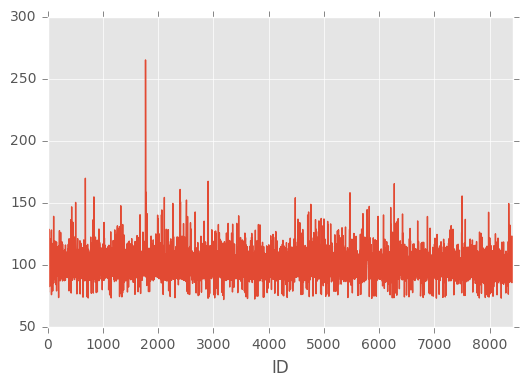

In [5]:
train.y.plot()

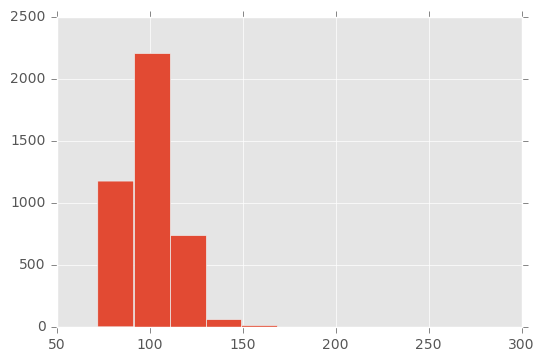

In [6]:
train.y.hist()